# **Gradient descent**
Gradient descent is one of the most important algorithms in ML and DL. it is a powerful optimization algorithm that can train regressions and other neural network models. To learn ML it is necessary to  understand the gradient descent algorithm deeply

## Linear Regression
When we get a set of data where a variable y depends on x we want to create a model that can predict y when we have x

In [137]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [138]:
df = np.loadtxt("single_variable_linear_function-noise.csv")
X, Y = df[:, 0], df[:, 1]

We can think of the intuitive solution that looks like this:

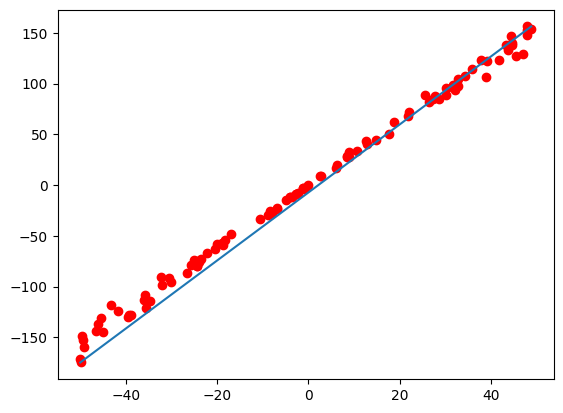

In [139]:
plt.scatter(X, Y, marker='o', color='red')
plt.plot([min(X),max(X)],[min(Y), max(Y)])

but it is not the optimal solution and it can cause mistakes.

Actually we are checking the difference between the predicted y and the actual y and we want it to be as minimal as possible. Finding a minimum of a function is done by the gradient descent algorithm.
Gradient Descent is an optimal algorithm for finding a minimum point in a function.

In [140]:
def predict(m_x):
  y_predicted = m_x * X
  return y_predicted

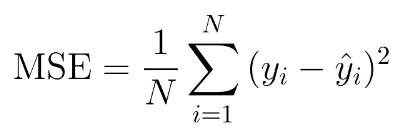

For linear regression, this MSE is nothing but the Cost Function. Mean Squared Error is the sum of the squared differences between the prediction and true value. And the output is a single number representing the cost

In [141]:
def cost(m):
    squaredError =(predict(m)-Y)**2
    return squaredError.sum()/len(X)

Finding slope (Derivative of cost function) by power rule and chain rule

In [142]:
def slope(m):
    derivative= 2*(predict(m) - Y) * X
    return derivative.sum()/len(X)

We start running the algorithm with a random value (m), according to the slope the algorithm knows the direction it should go and the learning rate is the step it should take in each iteration.
The definition of a learning rate is so important for the following reasons:

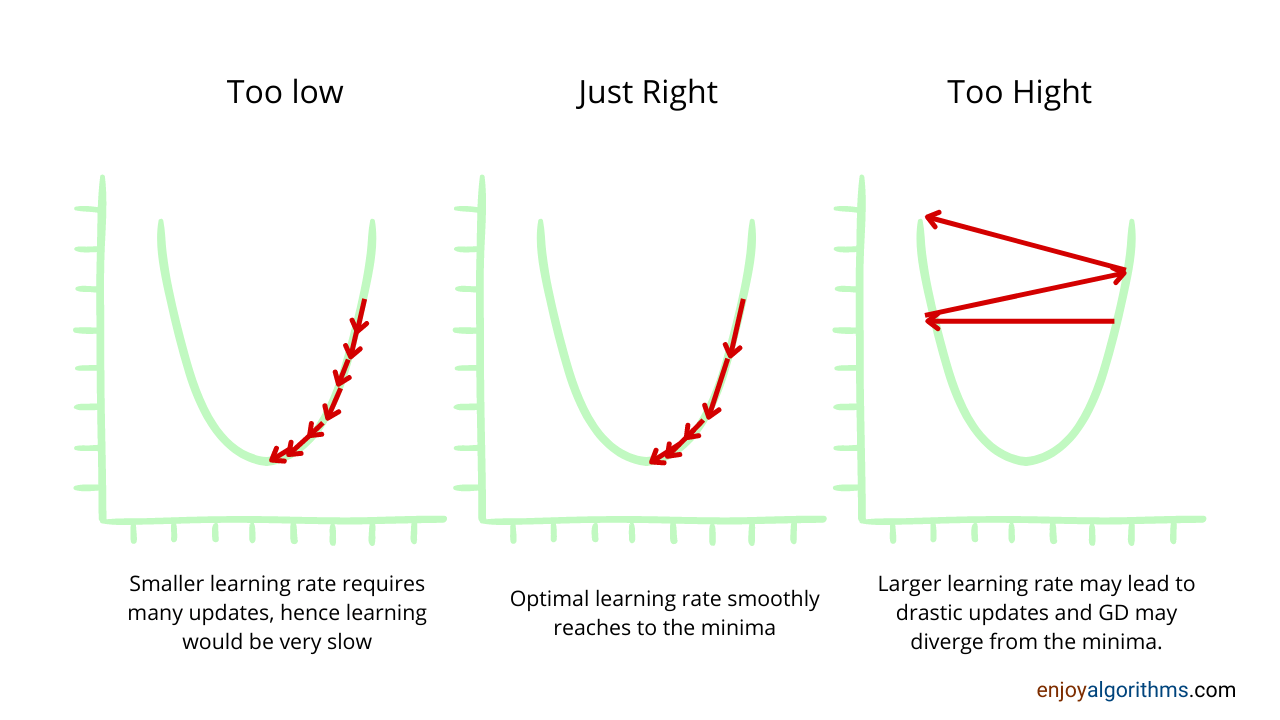

In [170]:
learning_rate = 0.0001
m = -6
iterations = 100

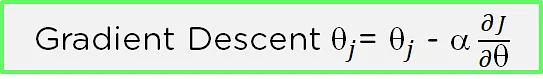

In [173]:
cost_history = []
points = []

for i in range(iterations):
    print( f"Iteration {i+1}: Cost {cost(m)}, m_x {m}" )
    slope_m = slope(m)
    cost_history.append(cost(m))
    points.append(m)
    m -= learning_rate * (slope_m)

Iteration 1: Cost 29.68265552462428, m_x 3.1148639431480816
Iteration 2: Cost 29.682655524624174, m_x 3.114863946239374
Iteration 3: Cost 29.68265552462412, m_x 3.1148639487677463
Iteration 4: Cost 29.682655524624092, m_x 3.1148639508357046
Iteration 5: Cost 29.682655524624053, m_x 3.1148639525270903
Iteration 6: Cost 29.682655524624053, m_x 3.1148639539104765
Iteration 7: Cost 29.68265552462404, m_x 3.1148639550419497
Iteration 8: Cost 29.682655524624014, m_x 3.1148639559673827
Iteration 9: Cost 29.68265552462403, m_x 3.114863956724296
Iteration 10: Cost 29.68265552462401, m_x 3.114863957343376
Iteration 11: Cost 29.682655524624007, m_x 3.114863957849722
Iteration 12: Cost 29.68265552462402, m_x 3.114863958263863
Iteration 13: Cost 29.682655524624007, m_x 3.11486395860259
Iteration 14: Cost 29.68265552462402, m_x 3.114863958879635
Iteration 15: Cost 29.682655524624, m_x 3.11486395910623
Iteration 16: Cost 29.68265552462402, m_x 3.114863959291563
Iteration 17: Cost 29.682655524624007, 

The plot below shows how the loss (cost) decreases during the training iterations:

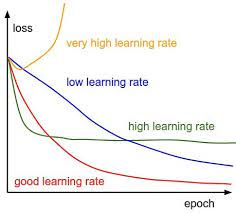

Text(0.5, 0, 'iterations')

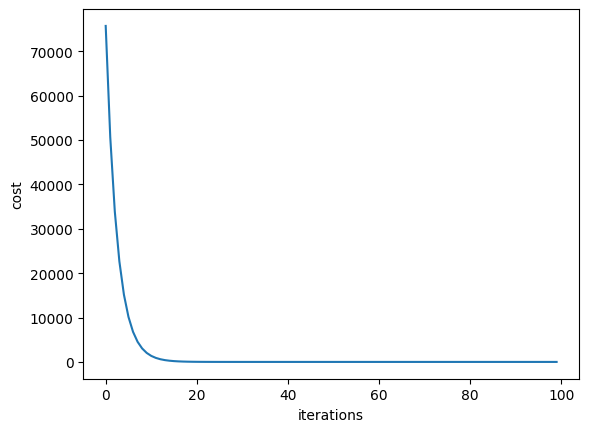

In [172]:
plt.plot(cost_history)
plt.title('')
plt.ylabel('cost')
plt.xlabel('iterations')

Thanks to a smart choice of the learning rate the graph looks like this.
But if we choose a smaller lr the result will be like this:
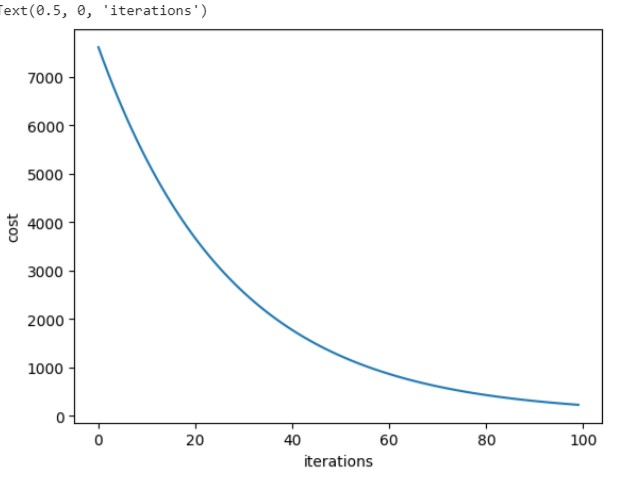

if we choose larger:
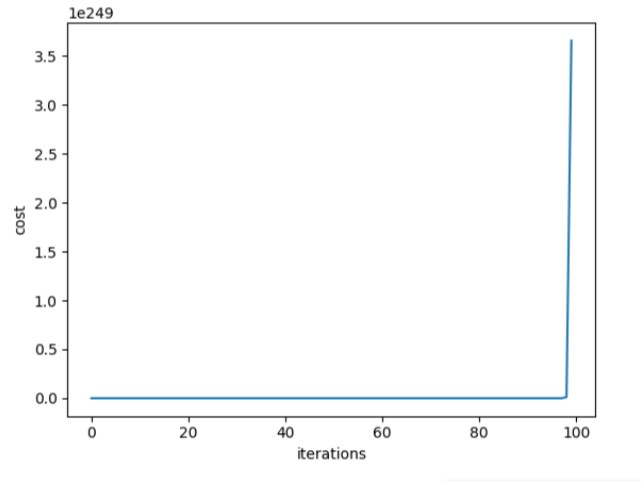

As we approach the minimum point the cost decreases:

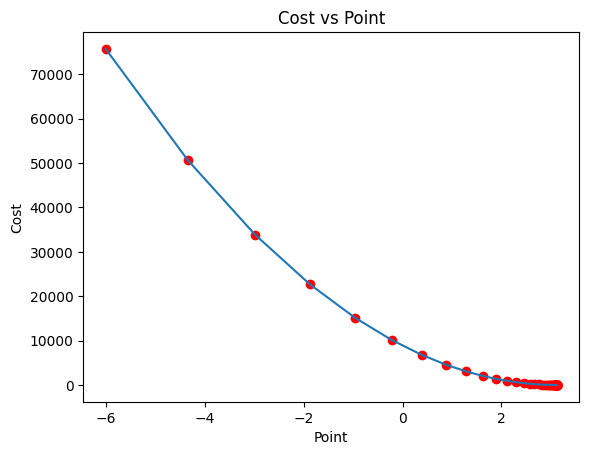

In [166]:
    plt.plot(points, cost_history)
    plt.scatter(points, cost_history, marker='o', color='red')
    plt.title("Cost vs Point")
    plt.ylabel("Cost")
    plt.xlabel("Point")
    plt.show()

Here we have the wrong regression line (from the beginning) and the regression line we got after training (green):

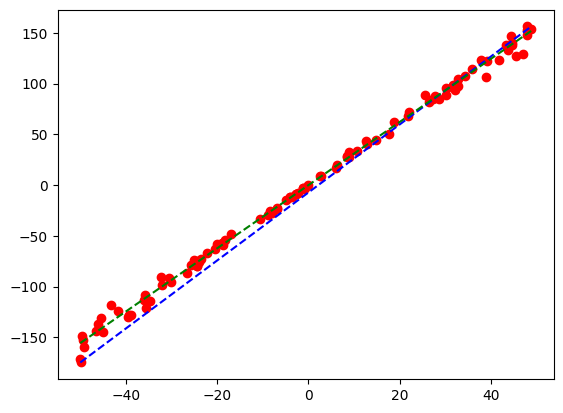

In [174]:
y_pred = X * m

plt.scatter(X, Y, marker='o', color='red')

plt.plot([min(X), max(X)], [min(Y), max(Y)], color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='green',markerfacecolor='red',
             markersize=10,linestyle='dashed')